In [5]:
import pandas as pd
import numpy as np

# Đọc dữ liệu
data = pd.read_csv('subset-covid-data.csv', header=0, encoding='ISO-8859-1')
# Hiển thị 5 dòng đầu
# data.head(10)
print('*'*20,'Nhập dữ liệu thành công','*'*20)
display(data)

******************** Nhập dữ liệu thành công ********************


,country,continent,date,day,month,year,cases,deaths,country_code,population
0,Afghanistan,Asia,2020-04-12,12,4,2020,34,3,AFG,37172386.0
1,Albania,Europe,2020-04-12,12,4,2020,17,0,ALB,2866376.0
2,Algeria,Africa,2020-04-12,12,4,2020,64,19,DZA,42228429.0
3,Andorra,Europe,2020-04-12,12,4,2020,21,2,AND,77006.0
4,Angola,Africa,2020-04-12,12,4,2020,0,0,AGO,30809762.0
...,...,...,...,...,...,...,...,...,...,...
201,Venezuela,America,2020-04-12,12,4,2020,0,0,VEN,28870195.0
202,Vietnam,Asia,2020-04-12,12,4,2020,4,0,VNM,95540395.0
203,Yemen,Asia,2020-04-12,12,4,2020,0,0,YEM,28498687.0
204,Zambia,Africa,2020-04-12,12,4,2020,0,0,ZMB,17351822.0


In [6]:
# Số lượng dòng và cột của bộ dữ liệu
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       206 non-null    object 
 1   continent     206 non-null    object 
 2   date          206 non-null    object 
 3   day           206 non-null    int64  
 4   month         206 non-null    int64  
 5   year          206 non-null    int64  
 6   cases         206 non-null    int64  
 7   deaths        206 non-null    int64  
 8   country_code  202 non-null    object 
 9   population    202 non-null    float64
dtypes: float64(1), int64(5), object(4)
memory usage: 16.2+ KB


In [7]:
# Tìm hiểu xem dữ liệu được thống kê cho những ngày nào
data.date.value_counts()

2020-04-12    204
2020-01-18      1
2020-04-11      1
Name: date, dtype: int64

Trung bình số ca mắc mới: 376.8186274509804
Trung vị của số ca mắc mới: 11.5


Matplotlib is building the font cache; this may take a moment.


Text(0, 0.5, 'Số lượng quốc gia')

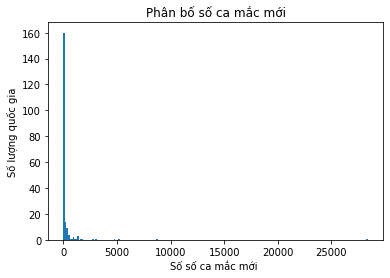

In [8]:
# Lọc dữ liệu nhiễu
cleaned_data = data[data.date=='2020-04-12']
# Vẽ biểu đồ phân bố số lượng ca mắc mới ở các quốc gia
print('Trung bình số ca mắc mới: ' + str(cleaned_data.cases.mean()))
print('Trung vị của số ca mắc mới: '+ str(cleaned_data.cases.median()))
import matplotlib.pyplot as plt

plt.hist(cleaned_data.cases, bins = 200)
plt.title('Phân bố số ca mắc mới')
plt.xlabel('Số số ca mắc mới ')
plt.ylabel('Số lượng quốc gia')

In [9]:
# Tổng số ca mắc mới, số ca tử vong ở từng châu lục
print('Tổng số ca nhiễm và số ca tử vong của các châu lục')
cleaned_data.groupby('continent')['cases','deaths'].sum()

Tổng số ca nhiễm và số ca tử vong của các châu lục


C:\Users\Admin\AppData\Local\Temp\ipykernel_4080\2934850573.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  cleaned_data.groupby('continent')['cases','deaths'].sum()


,cases,deaths
continent,,
Africa,714,52
America,33519,2111
Asia,12979,383
Europe,29591,2966
Oceania,68,4


In [10]:
# Tốp 5 quốc gia có số ca nhiễm mới cao nhất
print('5 quốc gia có số ca nhiễm mới cao nhất là')
data = data.sort_values('cases',ascending = False)
data.head(5)

5 quốc gia có số ca nhiễm mới cao nhất là


,country,continent,date,day,month,year,cases,deaths,country_code,population
198,United_States_of_America,America,2020-04-12,12,4,2020,28391,1831,USA,327167434.0
195,United_Kingdom,Europe,2020-04-12,12,4,2020,8719,839,GBR,66488991.0
190,Turkey,Asia,2020-04-12,12,4,2020,5138,95,TUR,82319724.0
98,Italy,Europe,2020-04-12,12,4,2020,4694,619,ITA,60431283.0
177,Spain,Europe,2020-04-11,11,4,2020,4550,605,ESP,46723749.0


In [11]:
# Tốp 5 quốc gia có số người tử vong cao nhất
print('5 quốc gia có số ca tử vong cao nhất là: ')
data = data.sort_values('deaths', ascending = False)
data.head(5)

5 quốc gia có số ca tử vong cao nhất là: 


,country,continent,date,day,month,year,cases,deaths,country_code,population
198,United_States_of_America,America,2020-04-12,12,4,2020,28391,1831,USA,327167434.0
195,United_Kingdom,Europe,2020-04-12,12,4,2020,8719,839,GBR,66488991.0
69,France,Europe,2020-04-12,12,4,2020,3114,635,FRA,66987244.0
98,Italy,Europe,2020-04-12,12,4,2020,4694,619,ITA,60431283.0
177,Spain,Europe,2020-04-11,11,4,2020,4550,605,ESP,46723749.0
